In [1]:
import time
from bs4 import BeautifulSoup
import requests
import json

In [2]:
print(initial_count)
print(len(author_links))
print(len(author_links_unique))

NameError: name 'initial_count' is not defined

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
import re

class AuthorDetails(object):

    def __init__(self, soup, link=None):
        self.page_soup = soup
        self.link = link
        
    def info_json_response(self):
        try:
            for tag in self.page_soup.find_all('script'):
                if 'window.__APOLLO_STATE__' in tag.text:
                    data = tag.text
            return data[26:]
        except Exception as e:
            error_trace = {}
            error_trace["link"] = self.link
            error_trace["method"] = "get_response"
            error_trace["message"] = str(e)
            print(json.dumps(error_trace, indent=4))
        return ""
        
    def find_first_key_user(self, json_data):
        find_key_string = [re.compile("^User:*").match]
        required_key = [k for k,v in json_data.items()
                if any (item(k) for item in find_key_string)]
        return required_key[0]
    
    def find_first_key_social(self, json_data):
        find_key_string = [re.compile("^\$User:.*socialStats$").match]
        required_key = [k for k,v in json_data.items()
                if any (item(k) for item in find_key_string)]
        return required_key[0]
    
    def get_author_details(self, key, json_data):
        try:
            user_name = json_data[key]['username']
            author_name = json_data[key]['name']
            author_bio = json_data[key]['bio']
            author_twitter = json_data[key]['twitterScreenName']
            return user_name, author_name, author_bio, author_twitter
        except Exception as e:
            error_trace = {}
            error_trace["link"] = self.link
            error_trace["method"] = "get_title"
            error_trace["message"] = str(e)
            print(json.dumps(error_trace, indent=4))
        return ""
    
    def get_author_social(self, key, json_data):
        try:
            user_following = json_data[key]['followingCount']
            author_follower = json_data[key]['followerCount']
            return user_following, author_follower
        except Exception as e:
            error_trace = {}
            error_trace["link"] = self.link
            error_trace["method"] = "get_title"
            error_trace["message"] = str(e)
            print(json.dumps(error_trace, indent=4))
        return ""
    
    def get_other_post_links_titles(self):
        other_post_links = []
        other_post_titles = []
        my_tag = "a"
        for i in self.page_soup.find_all('a',{"rel":"noopeneer"}):
            if i.find('h1'):
                other_post_links.append("medium.com"+i.get('href').split("?")[0])
                other_post_titles.append(i.text)
        return other_post_links, other_post_titles

In [5]:
author_links = []
initial_count = 0
with open("final_data_removing_duplicacy.json","r") as f:
    data = json.load(f)
for key in data:
    author_links.append(key['author_link'])
    initial_count += 1

# Final Author list after removing duplicacy
author_links_unique = list(set(author_links))

def page_info(link):
    CHROME_DRIVER_PATH='/home/mrx/Downloads/chromedriver'
    driver = webdriver.Chrome(CHROME_DRIVER_PATH)
    url = link
    driver.get(url)
    scrolls = 2
    while scrolls > 0:
        driver.execute_script(
                "window.scrollTo(0, document.body.scrollHeight-1000);")
        time.sleep(3)
        scrolls -= 1
    time.sleep(5)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    driver.quit()
    return soup

test_link = ["https://medium.com/@preethikasireddy"]
#for link in author_links_unique:
for link in test_link:
    page_contents = page_info(link)
    author_details = AuthorDetails(page_contents, link)
    
    json_script = json.loads(author_details.info_json_response())
    user_data_key = author_details.find_first_key_user(json_script)
    user_social_key = author_details.find_first_key_social(json_script)
    
    user_name, author_name, author_bio, author_twitter = author_details.get_author_details(user_data_key,json_script)
    following, followers = author_details.get_author_social(user_social_key, json_script)
    other_post_links, other_post_titles = author_details.get_other_post_links_titles()
    
print(user_name, author_name, author_bio, author_twitter)
print(following, followers)
print(other_post_links, other_post_titles)

preethikasireddy Preethi Kasireddy Founder & CEO of TruStory. I have a passion for understanding things at a fundamental level and sharing it as clearly as possible. www.preethikasireddy.com iam_preethi
208 70617
[] []


In [6]:
def other_post_links(soup):
    other_post_list = []
    my_tag = "a"
    for i in soup.find_all('a',{"rel":"noopeneer"}):
        if i.find('h1'):
            other_post_list.append("medium.com"+i.get('href').split("?")[0])
    return other_post_list

test_link = "https://medium.com/@preethikasireddy"
print(other_post_links(page_info(test_link)))

[]


In [9]:
soup = page_info("https://medium.com/@preethikasireddy")
test = []
test2 = []
my_tag = "a"
for i in soup.find_all('a',{"rel":"noopener"}):
    if i.find('h1'):
        test.append("medium.com"+i.get('href').split("?")[0])
        test2.append(i.text)
test2

[]

In [57]:
for item in href_container.find('h1'):
    test.append(href_container.get('href'))
test

bs4.element.ResultSet

In [13]:
soup.find_all('a',{"rel":"noopener"})

[<a aria-label="Homepage" href="/" rel="noopener"><div class="s g"><svg class="ax" height="22" viewbox="0 0 111.5 22" width="112"><path d="M56.3 19.5c0 .4 0 .5.3.7l1.5 1.4v.1h-6.5V19c-.7 1.8-2.4 3-4.3 3-3.3 0-5.8-2.6-5.8-7.5 0-4.5 2.6-7.6 6.3-7.6 1.6-.1 3.1.8 3.8 2.4V3.2c0-.3-.1-.6-.3-.7l-1.4-1.4V1l6.5-.8v19.3zm-4.8-.8V9.5c-.5-.6-1.2-.9-1.9-.9-1.6 0-3.1 1.4-3.1 5.7 0 4 1.3 5.4 3 5.4.8.1 1.6-.3 2-1zm9.1 3.1V9.4c0-.3-.1-.6-.3-.7l-1.4-1.5v-.1h6.5v12.5c0 .4 0 .5.3.7l1.4 1.4v.1h-6.5zm-.2-19.2C60.4 1.2 61.5 0 63 0c1.4 0 2.6 1.2 2.6 2.6S64.4 5.3 63 5.3a2.6 2.6 0 0 1-2.6-2.7zm22.5 16.9c0 .4 0 .5.3.7l1.5 1.4v.1h-6.5v-3.2c-.6 2-2.4 3.4-4.5 3.4-2.9 0-4.4-2.1-4.4-6.2 0-1.9 0-4.1.1-6.5 0-.3-.1-.5-.3-.7L67.7 7v.1H74v8c0 2.6.4 4.4 2 4.4.9-.1 1.7-.6 2.1-1.3V9.5c0-.3-.1-.6-.3-.7l-1.4-1.5v-.2h6.5v12.4zm22 2.3c0-.5.1-6.5.1-7.9 0-2.6-.4-4.5-2.2-4.5-.9 0-1.8.5-2.3 1.3.2.8.3 1.7.3 2.5 0 1.8-.1 4.2-.1 6.5 0 .3.1.5.3.7l1.5 1.4v.1H96c0-.4.1-6.5.1-7.9 0-2.7-.4-4.5-2.2-4.5-.9 0-1.7.5-2.2 1.3v9c0 .4 0 .5.3.7l1.4 

In [84]:
a = ['/free-code-camp/lets-learn-javascript-closures-66feb44f6a44?source=---------46------------------','https://coinbase.blog.ether.com/this-is-new?source=374']
new = []
for i in a:
    if i.startswith("http"):
        new.append(i.split("?")[0])
    else:
        new.append("https://medium.com"+i.split("?")[0])
new

['https://medium.com/free-code-camp/lets-learn-javascript-closures-66feb44f6a44',
 'https://coinbase.blog.ether.com/this-is-new']

In [ ]:
import re
with open("just_test.json","r") as f:
    test = json.load(f)
def find_first_key_social(json_data):
    find_key_string = [re.compile("^\$User:.*socialStats$").match]
    required_key = [k for k,v in json_data.items()
                    if any (item(k) for item in find_key_string)]
    return required_key[0]

def find_first_key_user(json_data):
    find_key_string = [re.compile("^User:*").match]
    required_key = [k for k,v in json_data.items()
                    if any (item(k) for item in find_key_string)]
    return required_key[0]

# string = "$User:d446dafbe292.socialStats"
print(find_first_key_social(test))
#for key in test:
    #print(key[u])

## Author data Analysis - Other tags from other posts

In [13]:
import json
with open("../conference_medium_data/author_data/author_info_final_paper.json") as f:
    author_data = json.load(f)
    
total_other_posts = 0

other_tag_list = []
for key in author_data:
    for item in key['other_posts']:
        other_tag_list.append(item['tags'])
        total_other_posts += 1
print("# of total other posts", total_other_posts)


related_tag = ["Smart Contract", "Smart Contracts", "Truffle", "Vyper", "Metamask",
              "Web3", "Solidity", "Web3", "Web3js", "Erc20", "Dapps", "Dapp", "Ethereum"]
other_tags = []
related = 0
for i in related_tag:
    for item in [j for j in other_tag_list]:
        if i in item:
            other_tag_list.remove(item)
            related += 1
            
print("# of related post: ", related)
print("# of non related post: ", len(other_tag_list))

from itertools import chain
break_nested_list = list(chain(*other_tag_list))
unique_list = list(set(break_nested_list))
print("# of uniqe tags: ", len(unique_list))
#print(unique_list)

from collections import Counter
freq_tags = Counter([item for item in break_nested_list])
print("Freq of each tag: ", freq_tags)

# of total other posts 13737
# of related post:  4754
# of non related post:  8983
# of uniqe tags:  6850
Freq of each tag:  Counter({'Blockchain': 3702, 'Cryptocurrency': 1618, 'Bitcoin': 1035, 'Crypto': 587, 'ICO': 531, 'Startup': 487, 'Technology': 425, 'Blockchain Technology': 297, 'Fintech': 294, 'Programming': 217, 'JavaScript': 216, 'Decentralization': 191, 'Food': 190, 'Tech': 179, 'Artificial Intelligence': 168, 'Entrepreneurship': 161, 'Token Sale': 149, 'Finance': 139, 'Machine Learning': 129, 'Innovation': 128, 'Investing': 124, 'Marketing': 121, 'Cryptocurrency Investment': 117, 'Security': 116, 'Token': 114, 'Cryptocurrency News': 112, 'Business': 104, 'Exchange': 102, 'Open Source': 97, 'Venture Capital': 97, 'Education': 96, 'AI': 94, 'Travel': 93, 'Software Development': 93, 'Ecommerce': 93, 'IoT': 92, 'Trading': 91, 'Development': 91, 'Gaming': 88, 'Health': 88, 'Blockchain Startup': 85, 'Economics': 85, 'Web Development': 84, 'Updates': 82, 'Healthcare': 81, 'Docker'

### Author data Analysis - Bio's from the authors

In [4]:
bio_list = []
for key in author_data:
    bio_list.append(key['bio'])
    
word_list = ["ethereum" , "blockchain", "ether", "smart contract", "smart contracts", "web3", "solidity"]
count = 0

has_bio = 0
no_bio = 0
for item in bio_list:
    if len(item) > 1:
        has_bio += 1
    else:
        no_bio += 1
        
for item in bio_list:
    for i in word_list:
        if i in item.lower():
            count += 1
print(has_bio)
print(no_bio)
print("Percentage of author has bio: ", has_bio*100/len(bio_list), "%")
print(count*100/len(bio_list))


534
91
Percentage of author has bio:  85.44 %
44.96


### No of posts for authors

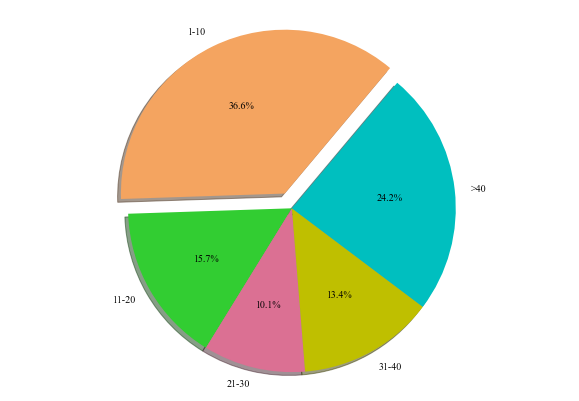

In [43]:
from collections import Counter
num_posts = []
for key in author_data:
    num_posts.append(len(key['other_posts']))
# sorted(num_posts, reverse=True)
post_freq = Counter([item for item in num_posts])

import operator
sorted_post_freq = sorted(post_freq.items(), key=operator.itemgetter(0))

n_0_10 = 0
n_11_20 = 0
n_21_30 = 0
n_31_40 = 0
n_40_ = 0
for pair in sorted_post_freq:
    if pair[0] <= 10:
        n_0_10 += pair[1]
    elif pair[0] > 10 and pair[0] <= 20:
        n_11_20 += pair[1]
    elif pair[0] > 20 and pair[0] <= 30:
        n_21_30 += pair[1]
    elif pair[0] > 30 and pair[0] <= 40:
        n_31_40 += pair[1]
    else:
        n_40_ += pair[1]
        
# print(n_0_10, "\n", n_11_20, "\n", n_21_30, "\n", n_31_40, "\n", n_40_)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams["font.family"] = "Times New Roman"
figure(num=None, figsize=(10, 7))

# Data to plot
labels = '1-10', '11-20', '21-30', '31-40', '>40'
sizes = [n_0_10, n_11_20, n_21_30, n_31_40, n_40_]
colors = ['sandybrown', 'limegreen', 'palevioletred', 'y', 'c'] # 'cornflowerblue',
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=50)

plt.axis('equal')
plt.savefig('medium_author_post_counts.pdf', dpi=300)

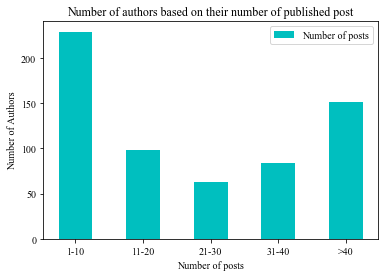

In [47]:
#Labels=['0', '1', '2', '3', '4', '5', '6', '7 or more']
y_pos=np.arange(len(labels))
plt.bar(y_pos + 0, sizes, width=0.5, color = 'c', label='Number of posts')
#plt.bar(y_pos + 0.25,CommentCount_for_Bar, width=0.25,color = 'c',label = 'Comments')
plt.xticks(y_pos, labels)
plt.legend(loc='best')
plt.ylabel('Number of Authors')
plt.xlabel('Number of posts')
plt.title("Number of authors based on their number of published post")
plt.savefig('medium_author_post_count.pdf', dpi=300)

### author reputation based on followers, claps, votes

In [14]:
following = []
followers = []
avg_clap_list = []
avg_voters_list = []

for key in author_data:
    following.append(key['following'])
    followers.append(key['followers'])
    
    clap_list = []
    voter_list = []
    for item in key['other_posts']:
        clap_list.append(item['claps'])
        voter_list.append(item['voters'])
    try:
        avg_clap_list.append(round(sum(clap_list)/len(clap_list)))
        avg_voters_list.append(round(sum(voter_list)/len(voter_list)))
    except Exception as e:
        print(e)
        
    
# print(sorted(followers, reverse=True))
# print(avg_clap_list)
# print(avg_voters_list)

### Avg no of followers and following for particular tags

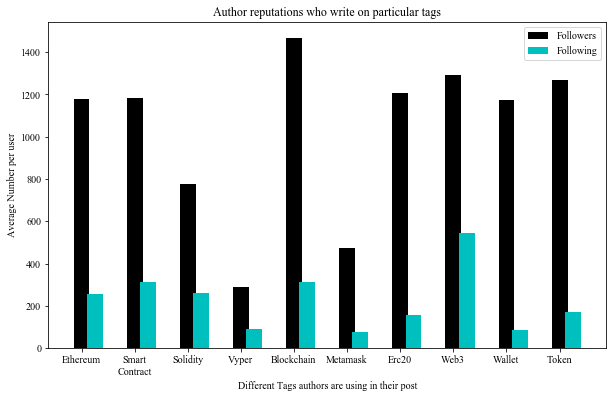

In [38]:

word_list = ["Ethereum" , "Blockchain", "Ether", "Smart Contract", "Smart Contracts", "Web3",\
             "Solidity", "Metamask", "Erc20", "Vyper", "Wallet", "Token", "Web3js", "Dapps", "Dapp"]

for i in word_list:
    follower_list = []
    following_list = []
    count = 0
    count_bio = 0
    count_twiter = 0
    for key in author_data:
        if i in [j for item in key['other_posts'] for j in item['tags']]:
            follower_list.append(key['followers'])
            following_list.append(key['following'])
            count += 1
        if i.lower() in key['bio'].lower().split(" "):
            count_bio += 1
    #print("\navg. # of followers of author who writes on", i, "is:", sum(follower_list)/count)
    #print("avg. # of following of author who writes on", i, "is:", sum(following_list)/count)
    #print(i, "in bio, # of authors:", count_bio)


from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"

figure(num=None, figsize=(10, 6))
    
follower = [1180, 1182, 776, 288, 1469, 474, 1205, 1292, 1174, 1267]
following = [254, 314, 261, 93, 315, 76, 157, 545, 84, 172]

Labels=['Ethereum', 'Smart\nContract', 'Solidity', 'Vyper', 'Blockchain', 'Metamask', 'Erc20', 'Web3', 'Wallet', "Token"]
y_pos=np.arange(len(Labels))
plt.bar(y_pos + 0.00, follower,width=0.3, color = 'k', label='Followers')
plt.bar(y_pos + 0.25, following, width=0.3, color = 'c', label = 'Following')
plt.xticks(y_pos, Labels)
plt.legend(('Followers','Following'))
plt.ylabel('Average Number per user')
plt.xlabel('Different Tags authors are using in their post')
plt.title("Author reputations who write on particular tags")
plt.savefig('medium_author_reputations.pdf', dpi=300)

### author twitter account

In [7]:
twitter_list = []
count = 0
for key in author_data:
    twitter_list.append(key['author_twitter'])

for item in twitter_list:
    if len(item) > 1:
        count += 1 

percent = count*100/len(twitter_list)
percent

62.08